In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
data = pd.read_csv("/content/Dataset.csv")
data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


# Removing Duplicated Values

In [6]:
display(data.drop_duplicates())

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [7]:
data.shape

(100000, 16)

# Removing Missing Values

In [8]:
clean_Data = data.columns[data.isnull().any()]

In [9]:
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [10]:
data.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [11]:
data.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

      Amount Type of Transaction Merchant

# Outlier 

In [12]:
xyz = data['Time']
xyz

0        19
1        17
2        14
3        14
4        23
         ..
99995    22
99996    23
99997    11
99998    22
99999    16
Name: Time, Length: 100000, dtype: int64

In [13]:
import numpy as np
import pandas as pd
outliers=[]

In [14]:
def detect_outlier(xyz):
    
    threshold=3
    mean_1 = np.mean(xyz)
    std_1 =np.std(xyz)
    
    
    for y in xyz:
        z_score= (y - xyz)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [15]:
outliers

[]

# Identifying datatype

In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.dtypes

Transaction ID             object
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object

In [18]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Time     14.56287
Age      44.99377
Fraud     0.07195
dtype: float64

#Models

In [19]:
NB= GaussianNB()
df=pd.read_csv("/content/Data-1 .csv")
#print(df1.dtypes)

data=df["Time"]
l=[]
for value in data:
    l.append(float(value))

df["Time"]=l

In [20]:
X_train=df.iloc[:50000,:-1]
y_train=df.iloc[:50000,-1]


X_test=df.iloc[50000:,:-1]
y_test=df.iloc[50000:,-1]

In [41]:
X_train_encoded=pd.get_dummies(X_train,drop_first=True)
X_test_encoded=pd.get_dummies(X_test,drop_first=True)


fitNB = NB.fit(X_train_encoded,y_train)
pred = NB.predict(X_test_encoded)
AONB = metrics.accuracy_score(y_test,pred)
print("Accuracy of naive_bayes: ",metrics.accuracy_score(y_test,pred))

Accuracy of naive_bayes:  0.9438


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, pred)
# plt.show()

array([[46436,     0],
       [ 2810,   754]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


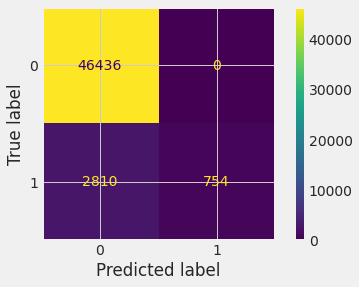

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
plot_confusion_matrix(fitNB, X_test_encoded, y_test)  
plt.show()

In [42]:
model = LogisticRegression(solver='liblinear', random_state=0)
fitLR = model.fit(X_train_encoded,y_train)
prob_pred = model.predict_proba(X_train_encoded)
y_pred = model.predict(X_test_encoded)
AOLR = model.score(X_train_encoded,y_train)
print("Accuracy of Logistic regression: ",model.score(X_train_encoded,y_train))

Accuracy of Logistic regression:  0.93568


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


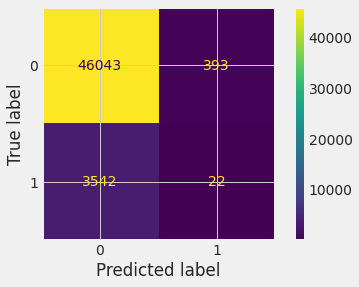

In [37]:
plot_confusion_matrix(fitLR, X_train_encoded, y_test)  
plt.show()

In [44]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
fitDT = clf.fit(X_train_encoded,y_train)
y_pred=clf.predict(X_test_encoded)
AODT = metrics.accuracy_score(y_test,y_pred)
print("Decision Tree Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Decision Tree Accuracy:  0.96354


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


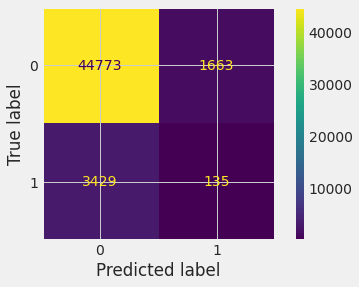

In [40]:
plot_confusion_matrix(fitDT, X_train_encoded, y_test)  
plt.show()

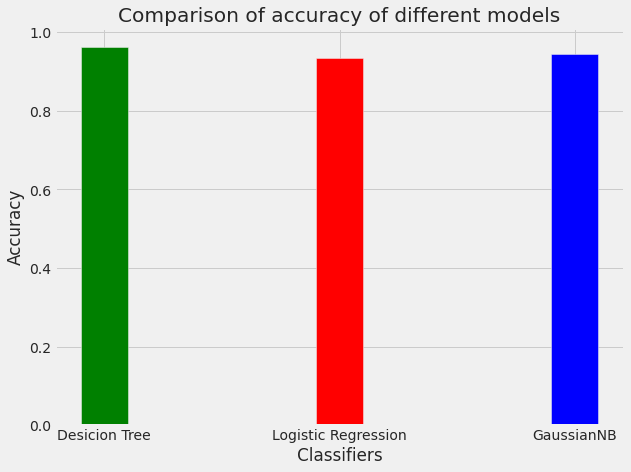

In [48]:
plt.figure(figsize=(20,15))
left_acc = [1,2,3]
height_acc = [AODT,AOLR,AONB]
tick_label_acc = ['Desicion Tree','Logistic Regression','GaussianNB']

plt.subplot(2,2,1);
plt.bar(left_acc, height_acc,tick_label = tick_label_acc ,width=0.2, color = ['green', 'red','blue']);
plt.xlabel("Classifiers");
plt.ylabel('Accuracy');
plt.title('Comparison of accuracy of different models')

plt.show()